In [2]:
# 1 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

# load rankings data
wood_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
wood_rankings['Type'] = 'Wood'

# load rankings data
steel_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
steel_rankings['Type'] = 'Steel'

#concate both data frames
total_rankings = pd.concat([wood_rankings, steel_rankings]).reset_index()

print(total_rankings.head())

   index  Rank          Name                       Park             Location  \
0      0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1      1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2      2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3      3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4      4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  Type  
0               CCI        2000    1333          2013  Wood  
1           Intamin        2006    1302          2013  Wood  
2  Dinn/PTC-Schmeck        1985    1088          2013  Wood  
3     Gravity Group        2006    1086          2013  Wood  
4              GCII        2004     923          2013  Wood  


In [3]:
#cleaning data
#roller coaster names
names_replace = [
    ('Grizzly \(KD\)', 'Grizzly'),
    ('Intimidator-305', 'Intimidator 305'),
    ('Superman: The Ride', 'Superman The Ride'),
    ('^The ', '')]
for i in names_replace:
    total_rankings['Name'] = total_rankings['Name'].str.replace(i[0], i[1], regex = True)

#park names
parks_replace = [
    ('Conneaut Lake Park', 'Conneaut Lake'),
    ('Luna Park/Coney Island', 'Luna Park'),
    ('Califoria’s Great America', 'California’s Great America'),
    ('Mt. Olympus Theme Park', 'Mount Olympus'),
    ('Oakwood Leisure Park', 'Oakwood'),
    ('PNE Playland', 'Playland'),
    ('ZDTs', "ZDT’s"),
    ('Fun Spot America', 'Fun Spot')]
for i in parks_replace:
    total_rankings['Park'] = total_rankings['Park'].str.replace(i[0], i[1], regex = True)


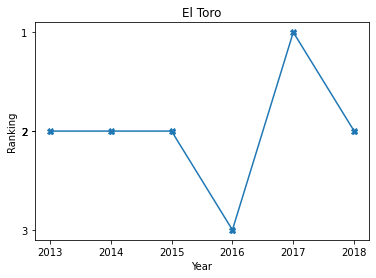

<Figure size 432x288 with 0 Axes>

In [4]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plot_roller_ranking(coaster_name, park_name, ranking_df):
    #creates a new df than only includes the function parameters
    coaster_ranking = ranking_df[(ranking_df['Name'] == coaster_name) & (ranking_df['Park'] == park_name)]
    fig, ax = plt.subplots()
    plt.plot(coaster_ranking['Year of Rank'], coaster_ranking['Rank'], marker = 'X')
    ax.set_xticks(coaster_ranking['Year of Rank'].values)
    ax.set_yticks(coaster_ranking['Rank'].values)
    #invierte el orden de los num en l axis y
    ax.invert_yaxis()
    plt.title(coaster_name)
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.show()
    plt.close()

# Create a plot of El Toro ranking over time
plot_roller_ranking('El Toro', 'Six Flags Great Adventure', total_rankings)
plt.clf()

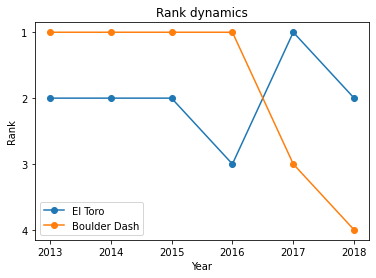

<Figure size 432x288 with 0 Axes>

In [5]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def plot_compared_roller_ranking(base, names):
    ax = plt.subplot()
    #set() transforms the df into a set and makes it iterable
    years = set()
    ranks = set()
    for name, park in names:
        coaster = base[(base['Name'] == name)&(base['Park'] == park)].reset_index()
        coaster.sort_values('Year of Rank', inplace=True)
        year = coaster['Year of Rank']
        years.update(year)
        rank = coaster['Rank']
        ranks.update(rank)
        plt.plot(year, rank, marker='o', label=name)
    ax.invert_yaxis()
    ax.set_xticks(sorted(years))
    ax.set_yticks(sorted(ranks))
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Rank dynamics')
    plt.show()
    
# Create a plot of El Toro and Boulder Dash roller coasters
plot_compared_roller_ranking(total_rankings, [('El Toro', 'Six Flags Great Adventure'), ('Boulder Dash', 'Lake Compounce')])
plt.clf()

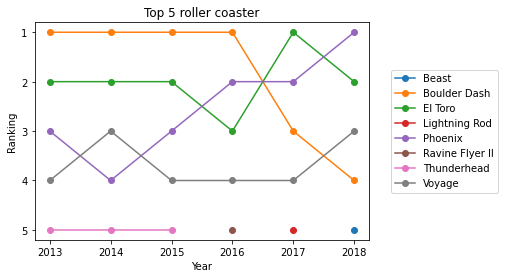

<Figure size 432x288 with 0 Axes>

In [6]:
# 4
# Create a function to plot top n rankings over time
def plot_compared_top_roller_ranking(n, ranking, coaster_type):
    ax = plt.subplot()
    years = set()
    coasters = ranking[(ranking['Type'] == coaster_type) & (ranking['Rank'] <= n)].reset_index()
    for name in sorted(set(coasters['Name'])):
        coaster = coasters[coasters['Name'] == name].reset_index(drop=True)
        coaster.sort_values('Year of Rank', inplace=True)
        year = coaster['Year of Rank']
        years.update(year)
        rank = coaster['Rank']
        plt.plot(year, rank, marker='o', label=name)
    ax.set_yticks([i for i in range(1,n+1)])
    ax.invert_yaxis()
    plt.title('Top {} roller coaster'.format(n))
    plt.legend(loc = 'center left', bbox_to_anchor=(1.05, 0.5))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.show()
    plt.close()            
        
# Create a plot of top n rankings over time
plot_compared_top_roller_ranking(5, total_rankings, 'Wood')
plt.clf()

In [7]:
# 5
# load roller coaster data
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


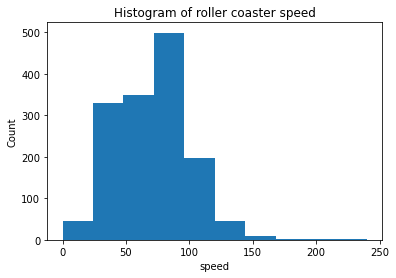

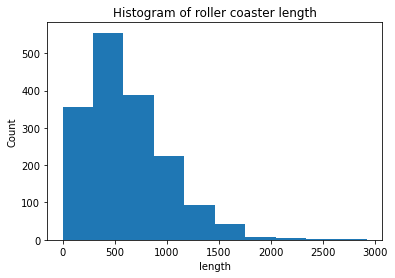

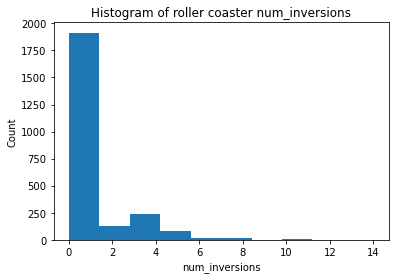

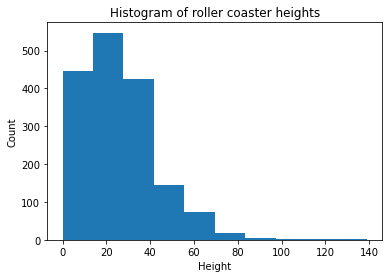

In [8]:
#6
# Create a function to plot histogram of column values
def plot_numeric_info_coasters(coaster_df, column_name):
    plt.hist(coaster_df[column_name].dropna())
    plt.title('Histogram of roller coaster {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()
    plt.close()
# Create histogram of roller coaster speed
plot_numeric_info_coasters(roller_coasters, 'speed')
plt.clf()
plt.close()

# Create histogram of roller coaster length
plot_numeric_info_coasters(roller_coasters, 'length')
plt.clf()
plt.close()

# Create histogram of roller coaster number of inversions
plot_numeric_info_coasters(roller_coasters, 'num_inversions')
plt.clf()
plt.close()

# Create a function to plot histogram of height values
def plot_coaster_height(coaster_df):
    heights = coaster_df[coaster_df['height'] <= 140]['height'].dropna()
    plt.hist(heights)
    plt.title('Histogram of roller coaster heights')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()
    plt.close()
    
# Create a histogram of roller coaster height
plot_coaster_height(roller_coasters)
plt.clf()
plt.close()

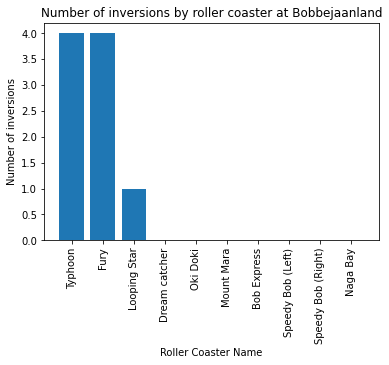

<Figure size 432x288 with 0 Axes>

In [9]:
# 7
# Create a function to plot inversions by coaster at park
def plot_num_inversion_park(coaster_df, park_name):
    park_num_inversions = coaster_df[coaster_df['park'] == park_name].sort_values('num_inversions', ascending=False)
    ax = plt.subplot()
    plt.bar(park_num_inversions['name'], park_num_inversions['num_inversions'])
    ax.set_xticks(range(len(park_num_inversions['name'])))
    ax.set_xticklabels(park_num_inversions['name'], rotation = 90)
    plt.title('Number of inversions by roller coaster at {}'.format(park_name))
    plt.xlabel('Roller Coaster Name')
    plt.ylabel('Number of inversions')
    plt.show()
    plt.close()
    
# Create barplot of inversions by roller coasters
plot_num_inversion_park(roller_coasters, 'Bobbejaanland')
plt.clf()

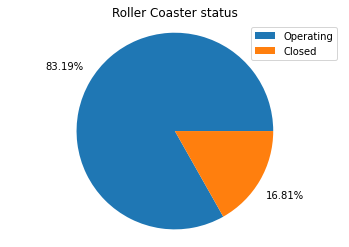

<Figure size 432x288 with 0 Axes>

In [10]:
# 8
# Create a function to plot a pie chart of status.operating
def plot_status_roller(coaster_df):
    operating_coasters = coaster_df[coaster_df['status'] == 'status.operating']
    close_coasters = coaster_df[coaster_df['status'] == 'status.closed.definitely']
    status = [len(operating_coasters), len(close_coasters)]
    plt.pie(status, autopct = '%0.2f%%', pctdistance = 1.3,)
    plt.axis('equal')
    plt.legend(labels = ['Operating', 'Closed'])
    plt.title('Roller Coaster status')
    plt.show()
    plt.close()
    
# Create pie chart of roller coasters
plot_status_roller(roller_coasters)
plt.clf()

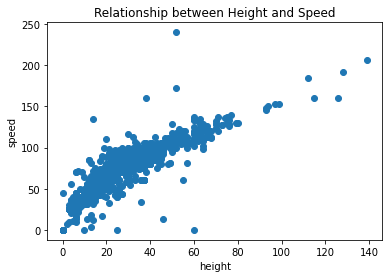

<Figure size 432x288 with 0 Axes>

In [11]:
# 9
# Create a function to plot scatter of any two columns
def plot_scatter_roller(coaster_df, column_x, column_y):
    plt.scatter(coaster_df[column_x], coaster_df[column_y])
    plt.title('Relationship between {} and {}'.format(column_x, column_y))
    plt.xlabel(column_x)
    plt.ylabel(column_x)
    plt.show()
    plt.close()
    
# Create a function to plot scatter of speed vs height
def plot_scatter_roller_height(coaster_df, height, speed):
    coaster_df = coaster_df[coaster_df['height'] < 140]
    plt.scatter(coaster_df[height], coaster_df[speed])
    plt.title('Relationship between Height and Speed')
    plt.xlabel(height)
    plt.ylabel(speed)
    plt.show()
    plt.close()

# Create a scatter plot of roller coaster height by speed
plot_scatter_roller_height(roller_coasters, 'height', 'speed')
plt.clf()

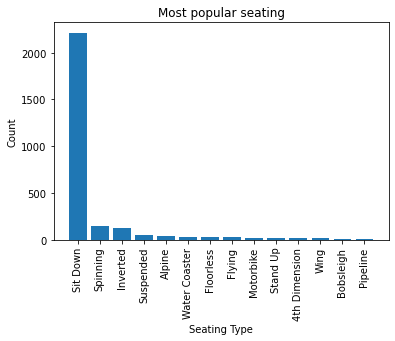

<Figure size 432x288 with 0 Axes>

In [12]:
#function what seating type is most popular
def plot_types_seating(coaster_df):
    coaster = coaster_df[coaster_df['seating_type'] != 'na']
    coaster_seating = coaster.groupby('seating_type').name.count().reset_index()
    coaster_seating_sorted = coaster_seating.sort_values('name', ascending = False)
    ax = plt.subplot()
    plt.bar(coaster_seating_sorted['seating_type'], coaster_seating_sorted['name'])
    ax.set_xticks(range(len(coaster_seating_sorted)))
    ax.set_xticklabels(coaster_seating_sorted['seating_type'], rotation = 90)
    plt.title('Most popular seating')
    plt.xlabel("Seating Type")
    plt.ylabel("Count")
    plt.show()
    plt.close()
    
    
plot_types_seating(roller_coasters)
plt.clf()